### **Team Name: EcoAir Synergy**
### **Team Members: 4**
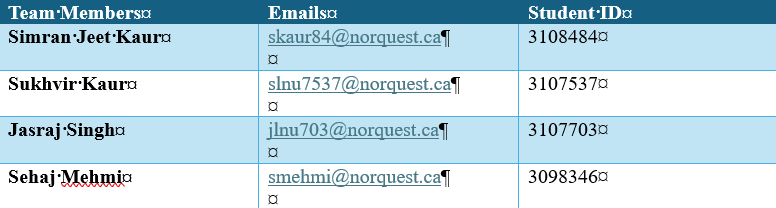


### **Introduction:**

**Dataset:** National Pollutant Release Inventory (NPRI) Dataset (2000-2022).
The NPRI dataset provides comprehensive data on the release, disposal, and transfer of pollutants in Canada. It contains information about pollutants released from facilities across the country, detailing how pollutants are managed over time.

**ML Problem:** Predicting trends of criteria air contanminants (Sulphur dioxide, Nitrogen oxides, volatile organic matter, particulate matter, and carbon monoxide) for the next five years.

The goal of this project is to predict the trends of various air contaminants over the next five years, using historical data from the NPRI dataset.

**Objective:** To explore, clean and prepare the dataset for predictive modeling.


We aimed to prepare the dataset, which includes both historical release data (from the "Releases 2000-2020" sheet) and disposal/transfer data (from the "Disposals and Transfers 00-20" sheet), for predictive modeling. However, for the initial steps, we focused primarily on the "Releases 2000-2020" dataset.

### **The dataset consisted of three sheets:**
1. Releases 2000-2020 (Data regarding the Pollutant releases from facilities over time)

2. Disposals and Transfers 00-20 (This data includes on how pollutantswere disposed or transferred for treatment/recycling)

3. Comments (Additional notes about specific data points)

Key attributes: Facility ID, Year, Province, Industry Type, Pollutant Name, Release Quantity, Disposal Quantity, Transfer Destination.

### **Reason for focusing on "Releases 2000-2020" Dataset**
The "Releases 2000-2020" dataset is the most relevant for predicting trends in criteria air contaminants. This dataset provides direct information on the amount of pollutants released into the environment over time, which is key for understanding pollution trends and making accurate predictions.

While the other sheets—"Disposals and Transfers" and "Comments"—provide useful supplementary information (like how pollutants were treated or transferred), the "Releases" data directly aligns with our goal of predicting air quality trends. The release data offers more direct insight into the environmental impact of these pollutants over time, making it more suitable for the initial phase of data cleaning and preparation for time series analysis.


In [3]:
# Importing required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations, especially with arrays
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations
import seaborn as sns  # For statistical data visualization

In [5]:
# Reading the CSV file into a pandas DataFrame
# The 'encoding' parameter is set to 'latin1' to handle potential encoding issues
df_releases = pd.read_csv("NPRI_2000_2022_Release.csv", encoding="latin1")

# Displaying the first 5 rows of the DataFrame to get an initial overview of the data
df_releases.head(5)

<ipython-input-5-c711f539ff8b>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_releases = pd.read_csv("NPRI_2000_2022_Release.csv", encoding="latin1")


,Reporting_Year / Anne,NPRI_ID / No_INRP,Number of employees,Company_Name / Dnomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,NAICS Title / Titre Code_SCIAN,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack / Point,Release to Air - Storage / Handling,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,113.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,7.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,1,440,Alberta-Pacific Forest Industries Inc.,(blank),322112,Chemical pulp mills,AB,County of Athabasca,54.923116,...,NaN,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Displaying the summary of the dataframe
df_releases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Anne                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dnomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [23]:
# Displaying the column names of the Dataframe
df_releases.columns

Index(['reporting_year', 'npri_id', 'num_employees', 'company_name',
       'facility_name', 'naics_code', 'naics_title', 'province', 'city',
       'latitude', 'longitude', 'cas_number', 'substance_name', 'units',
       'estimation_method', 'release_air_fugitive',
       'release_air_other_non_point', 'release_air_road_dust',
       'release_air_spills', 'release_air_stack_point',
       'release_air_storage_handling', 'release_land_leaks',
       'release_land_other', 'release_land_spills', 'release_water_direct',
       'release_water_leaks', 'release_water_spills', 'release_total'],
      dtype='object')

In [24]:
# Creating a copy of the DataFrame to avoid modifying the original data
df_releases_cleaned = df_releases.copy()

In [25]:
# Renaming columns for readability and consistency
df_releases_cleaned.rename(columns={
    "Reporting_Year / Anne": "reporting_year",
    "NPRI_ID / No_INRP": "npri_id",
    "Number of employees": "num_employees",
    "Company_Name / Dnomination_sociale_de_l'entreprise": "company_name",
    "Facility_Name / Installation": "facility_name",
    "NAICS / Code_SCIAN": "naics_code",
    "NAICS Title / Titre Code_SCIAN": "naics_title",
    "PROVINCE": "province",
    "City": "city",
    "Latitude": "latitude",
    "Longitude": "longitude",
    "CAS_Number / No_CAS": "cas_number",
    "Substance Name (English) / Nom de substance (Anglais)": "substance_name",
    "Units / Units": "units",
    "Estimation_Method / Mthode_dÕestimation": "estimation_method",
    "Release to Air - Fugitive": "release_air_fugitive",
    "Release to Air - Other Non-Point ": "release_air_other_non_point",
    "Release to Air - Road dust  ": "release_air_road_dust",
    "Release to Air - Spills ": "release_air_spills",
    "Release to Air - Stack / Point  ": "release_air_stack_point",
    "Release to Air - Storage / Handling ": "release_air_storage_handling",
    "Releases to Land - Leaks": "release_land_leaks",
    "Releases to Land - Other ": "release_land_other",
    "Releases to Land - Spills ": "release_land_spills",
    "Releases to Water Bodies - Direct Discharges ": "release_water_direct",
    "Releases to Water Bodies - Leaks": "release_water_leaks",
    "Releases to Water Bodies - Spills ": "release_water_spills",
    "Sum of release to all media (<1tonne)": "release_total"
}, inplace=True)

# Check if the columns have been renamed correctly
print(df_releases_cleaned.columns)


Index(['reporting_year', 'npri_id', 'num_employees', 'company_name',
       'facility_name', 'naics_code', 'naics_title', 'province', 'city',
       'latitude', 'longitude', 'cas_number', 'substance_name', 'units',
       'estimation_method', 'release_air_fugitive',
       'release_air_other_non_point', 'release_air_road_dust',
       'release_air_spills', 'release_air_stack_point',
       'release_air_storage_handling', 'release_land_leaks',
       'release_land_other', 'release_land_spills', 'release_water_direct',
       'release_water_leaks', 'release_water_spills', 'release_total'],
      dtype='object')


In [26]:
# Checking the shape
df_releases_cleaned.shape

(737516, 28)

In [27]:
# Creating a Dataframe showing missing values and data types for each column
missing_and_dtypes = pd.DataFrame({
    'Missing Values': df_releases_cleaned.isnull().sum(),
    'Data Type': df_releases_cleaned.dtypes
})
missing_and_dtypes

,Missing Values,Data Type
reporting_year,0,int64
npri_id,0,int64
num_employees,616,object
company_name,0,object
facility_name,1176,object
naics_code,0,int64
naics_title,0,object
province,0,object
city,90764,object
latitude,4082,float64


In [28]:
# Calculating the percentage of null values in each column
null_percentage = (df_releases_cleaned.isnull().sum() / len(df_releases_cleaned)) * 100
null_percentage

,0
reporting_year,0.000000
npri_id,0.000000
num_employees,0.083524
company_name,0.000000
facility_name,0.159454
naics_code,0.000000
naics_title,0.000000
province,0.000000
city,12.306716
latitude,0.553480


In [29]:
# Checking duplicates
duplicates = df_releases_cleaned.duplicated().sum()
print(f"Number of duplicate rows in releases 2000-2022 dataset: {duplicates}")

Number of duplicate rows in releases 2000-2022 dataset: 0


In [30]:
# List of columns to drop
columns_to_drop = [
    "num_employees", "facility_name", "estimation_method",
    "release_land_leaks", "release_land_other", "release_land_spills",
    "release_water_direct", "release_water_leaks", "release_water_spills"
]

# Drop the columns
df_releases_cleaned.drop(columns=columns_to_drop, inplace=True)

# Check the updated dataframe
print(df_releases_cleaned.columns)

Index(['reporting_year', 'npri_id', 'company_name', 'naics_code',
       'naics_title', 'province', 'city', 'latitude', 'longitude',
       'cas_number', 'substance_name', 'units', 'release_air_fugitive',
       'release_air_other_non_point', 'release_air_road_dust',
       'release_air_spills', 'release_air_stack_point',
       'release_air_storage_handling', 'release_total'],
      dtype='object')


In [32]:
# Checking the shape of the data after dropping the columns
df_releases_cleaned.shape

(737516, 19)

In [55]:
# Calculating and display the number of missing values in each column of the cleaned DataFrame
df_releases_cleaned.isnull().sum()

,0
reporting_year,0
npri_id,0
company_name,0
naics_code,0
naics_title,0
province,0
city,0
latitude,0
longitude,0
cas_number,0


### **Steps taken to do the Data Cleaning**

**Dataset Loading:** The dataset is loaded into a DataFrame using pandas.read_csv().
Initial Exploration: Basic inspection of the dataset, including checking the first few rows, data types, and column names.

**Data Cleaning:**
1. Renaming columns to make them more readable and consistent.
2. Checking for missing values and calculating the percentage of null values in each column.
3. Removing duplicate rows to ensure data integrity.
4. Dropping unnecessary columns that don't contribute to the analysis.

Ensuring that the cleaned dataset is free from missing values (or deciding how to handle them in subsequent steps).


### **CMPT3510: Phase-1**

## **Step 1: Converting the Releases Dataset to Time Series Format**

The reporting_year column was originally in a non-date format (integer values representing the year). To enable proper time series analysis, we converted this column to a datetime type. This conversion allows for time-based operations, such as sorting and grouping by year.

Next, we sorted the data by the reporting_year and province columns. Sorting is crucial for time series analysis, as it ensures that data is ordered chronologically.

In [57]:
# Converting Dataset to Time Series Format

# Ensure 'reporting_year' is in datetime format
df["reporting_year"] = pd.to_datetime(df["reporting_year"], format="%Y")

# Sort dataset chronologically by year and province
df = df.sort_values(by=["reporting_year", "province"]).reset_index(drop=True)

# Displaying dataset info to confirm time series formatting
print("Dataset after Time Series Transformation:")
print(df.info())
print(df.head())

Dataset after Time Series Transformation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   reporting_year                737516 non-null  datetime64[ns]
 1   npri_id                       737516 non-null  int64         
 2   company_name                  737516 non-null  object        
 3   naics_code                    737516 non-null  int64         
 4   naics_title                   737516 non-null  object        
 5   province                      737516 non-null  object        
 6   city                          646752 non-null  object        
 7   latitude                      733434 non-null  float64       
 8   longitude                     733434 non-null  float64       
 9   cas_number                    737516 non-null  object        
 10  substance_name                737516 n

In [58]:
# Displaying the first few rows to check the data after restucturing it to time-series format
df.head()

,reporting_year,npri_id,company_name,naics_code,naics_title,province,city,latitude,longitude,cas_number,substance_name,units,release_air_fugitive,release_air_other_non_point,release_air_road_dust,release_air_spills,release_air_stack_point,release_air_storage_handling,release_total
0,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,10049-04-4,Chlorine dioxide,tonnes,NaN,NaN,NaN,NaN,5.200,NaN,NaN
1,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-56-1,Methanol,tonnes,NaN,NaN,NaN,NaN,113.000,NaN,NaN
2,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,67-66-3,Chloroform,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,75-07-0,Acetaldehyde,tonnes,NaN,NaN,NaN,NaN,7.670,NaN,NaN
4,2000-01-01,1,Alberta-Pacific Forest Industries Inc.,322112,Chemical pulp mills,AB,County of Athabasca,54.923116,-112.861867,7647-01-0,Hydrochloric acid,tonnes,NaN,NaN,NaN,NaN,0.665,NaN,NaN


We aggregated the pollutant emissions data by year and province. This was necessary to summarize the total emissions for each pollutant by the two key factors: the reporting year and the province. By grouping the data in this manner, we can better analyze the trends and patterns of pollutant emissions over time and across different geographic areas.

In [59]:
# Aggregating Emissions by Year & Province

# Defining pollutant columns to aggregate
pollutant_columns = [
    "release_air_fugitive", "release_air_other_non_point", "release_air_road_dust",
    "release_air_spills", "release_air_stack_point", "release_air_storage_handling",
    "release_total"
]

# Aggregate emissions by year and province
df_aggregated = df.groupby(["reporting_year", "province"])[pollutant_columns].sum().reset_index()

# Displaying aggregated dataset
print("Aggregated Dataset:")
df_aggregated.head()

Aggregated Dataset:


,reporting_year,province,release_air_fugitive,release_air_other_non_point,release_air_road_dust,release_air_spills,release_air_stack_point,release_air_storage_handling,release_total
0,2000-01-01,AB,3745.780,353.789,0.0,70.768,37930.124000,1086.282,39.920
1,2000-01-01,BC,316.429,106273.584,0.0,0.002,15103.726000,226.045,16.379
2,2000-01-01,MB,192.162,0.000,0.0,0.271,6561.267000,25.025,9.986
3,2000-01-01,NB,97.944,0.002,0.0,0.000,7592.858000,15.461,0.495
4,2000-01-01,NL,95.274,26.590,0.0,0.000,2933.024882,165.660,0.000


In [60]:
# Printing a list of unique city values in the 'city' column
print(list(df['city'].unique()))

['County of Athabasca', 'Edmonton', 'Fairview', nan, 'Calgary', 'MD of Northern Lights', 'Gibbons', 'Warburg', 'EDMONTON', 'Fort Saskatchewan', 'FORT SASKATCHEWAN', 'Lloydminster', 'Rocky Mountain House', 'THORSBY', 'Millarville', 'DEVON', 'Redwater', 'Grande Centre', 'CALGARY', 'Wembley', 'HIGH RIVER', 'Fox Creek', '0', 'Drayton Valley', 'SLAVE LAKE', 'Crossfield', 'Nisku', 'Whitecourt', 'Taber', 'Forestburg', 'Hanna', 'Municipal District of Greenview', 'Swan Hills', 'Olds', 'Ferrier', 'Medicine Hat', 'OLDS', 'Lacombe County', 'Sturgeon County', 'Nordegg', 'Rimbey', 'CAR ELKTNU', 'Rainbow Lake', 'Lethbridge', 'BUCK LAKE', 'Lacombe', 'Bowden', 'ROCKY VIEW COUNTY', 'NISKU', 'Pincher Creek', 'Caroline', 'Peace River', 'Leduc', 'ROSEVEAR', 'Fort McMurray', 'WABAMUN', 'Duffield', 'MEDICINE HAT', 'Cochrane', 'Innisfail', 'Edson', 'na', 'Grande Prairie', 'Carseland', 'Fort Saskatchewan,Strathcona County', 'Hinton', 'Wheatland County', 'Bruderheim', 'Sherwood Park', 'WIMBORNE', 'RAINBOW LAKE'

In [61]:
# Printing the data type of the 'city' column
print(df['city'].dtype)

object


In [62]:
# Converting the 'city' column to categorical data type
df['city'] = df['city'].astype('category')

In [63]:
# Printing the data type of city column to ensure that it is converted from object to category
print(df['city'].dtype)

category


In [64]:
# Ensuring 'city' column is treated as a string
df['city'] = df['city'].astype(str)

# Identifying and printing unique values before replacement (for debugging)
print("Unique values before replacement:", df['city'].unique())

# Getting the most frequent city (excluding 0 values)
most_frequent_city = df[df['city'] != '0']['city'].mode()[0]  # Avoids selecting '0' as mode

# Replacing NaN, 0 (both int and str), and blank spaces
df['city'] = df['city'].replace([0, '0', None, 'nan', 'NaN', ' ', ''], most_frequent_city)

# Identifying and printing unique values after replacement (for debugging)
print("Unique values after replacement:", df['city'].unique())

# Displaying the last 20 rows
df.tail(20)

Unique values before replacement: ['County of Athabasca' 'Edmonton' 'Fairview' ... 'Dollard' 'Oxbow'
 'Eastend']
Unique values after replacement: ['County of Athabasca' 'Edmonton' 'Fairview' ... 'Dollard' 'Oxbow'
 'Eastend']


,reporting_year,npri_id,company_name,naics_code,naics_title,province,city,latitude,longitude,cas_number,substance_name,units,release_air_fugitive,release_air_other_non_point,release_air_road_dust,release_air_spills,release_air_stack_point,release_air_storage_handling,release_total
737496,2022-01-01,31004,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Destruction Bay,61.24920,-135.79970,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,tonnes,NaN,NaN,NaN,NaN,1.330000,NaN,NaN
737497,2022-01-01,31004,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Destruction Bay,61.24920,-135.79970,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,tonnes,NaN,NaN,NaN,NaN,1.320000,NaN,NaN
737498,2022-01-01,31005,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Old Crow,67.56750,-139.84400,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,NaN,NaN,NaN,NaN,45.900000,NaN,NaN
737499,2022-01-01,31005,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Old Crow,67.56750,-139.84400,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,tonnes,NaN,NaN,NaN,NaN,1.480000,NaN,NaN
737500,2022-01-01,31005,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Old Crow,67.56750,-139.84400,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,tonnes,NaN,NaN,NaN,NaN,1.470000,NaN,NaN
737501,2022-01-01,31006,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Watson Lake,60.06645,-128.72136,11104-93-1,Nitrogen oxides (expressed as nitrogen dioxide),tonnes,NaN,NaN,NaN,NaN,209.290000,NaN,NaN
737502,2022-01-01,31006,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Watson Lake,60.06645,-128.72136,630-08-0,Carbon monoxide,tonnes,NaN,NaN,NaN,NaN,55.590000,NaN,NaN
737503,2022-01-01,31006,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Watson Lake,60.06645,-128.72136,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,tonnes,NaN,NaN,NaN,NaN,3.240000,NaN,NaN
737504,2022-01-01,31006,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Watson Lake,60.06645,-128.72136,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,tonnes,NaN,NaN,NaN,NaN,3.130000,NaN,NaN
737505,2022-01-01,31007,Yukon Electrical Company Limited,221112,Fossil-fuel electric power generation,YT,Swift River,60.00111,-131.18861,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,tonnes,NaN,NaN,NaN,NaN,0.530000,NaN,NaN


**Objective:**
The objective of this step is to fill missing geographic coordinates (latitude and longitude) in the dataset. These missing values are critical for further analysis and geographical mapping, so the goal is to ensure that every entry has a complete set of geographic information.

**Process:**
## **Mapping of Known Cities to Latitude and Longitude:**

We first created a mapping of known cities to their respective latitude and longitude values by grouping the dataset based on the city column and selecting the first valid latitude and longitude pair for each city.
The result was stored as a dictionary (city_lat_lon_map) with cities as keys and their corresponding latitude and longitude as values.

## **Filling Missing Latitude and Longitude by City:**
We then defined a function (fill_lat_lon_by_city) to iterate over the rows of the dataset.
If the latitude or longitude was missing, the function would check if the city in the current row had an entry in the city_lat_lon_map. If a match was found, the missing coordinates were filled with the known values for that city.
The dataset was then updated using the apply() function to fill the missing values.

## **Mapping of Known Provinces to Latitude and Longitude:**
After filling missing values by city, we followed a similar process for missing values at the province level.
A new mapping of provinces to latitude and longitude (province_lat_lon_map) was created by grouping the dataset based on the province column and selecting the first valid latitude and longitude for each province.

## **Filling Missing Latitude and Longitude by Province:**
A second function (fill_lat_lon_by_province) was defined to handle cases where city-level latitude and longitude were still missing.
If the latitude and longitude were missing, the function checked if the province had a corresponding entry in the province_lat_lon_map and filled in the missing coordinates using the known values for the province.

## **Verification**

After filling the missing values, we verified that there were no remaining null values in the latitude and longitude columns by printing the count of missing values.
Additionally, a sample of the rows with filled latitude and longitude values was displayed to confirm that the process was successfully applied.

In [65]:
# Creating a mapping of known (city → latitude, longitude)
city_lat_lon_map = df.dropna(subset=['latitude', 'longitude']).groupby('city')[['latitude', 'longitude']].first().to_dict(orient='index')

# Filling missing latitude & longitude using city reference
def fill_lat_lon_by_city(row):
    if pd.isnull(row['latitude']) or pd.isnull(row['longitude']):
        key = row['city']
        if key in city_lat_lon_map:
            row['latitude'] = city_lat_lon_map[key]['latitude']
            row['longitude'] = city_lat_lon_map[key]['longitude']
    return row

df = df.apply(fill_lat_lon_by_city, axis=1)

#  Creating a mapping of known (province → latitude, longitude)
province_lat_lon_map = df.dropna(subset=['latitude', 'longitude']).groupby('province')[['latitude', 'longitude']].first().to_dict(orient='index')

# Fill missing latitude & longitude using province reference
def fill_lat_lon_by_province(row):
    if pd.isnull(row['latitude']) or pd.isnull(row['longitude']):
        key = row['province']
        if key in province_lat_lon_map:
            row['latitude'] = province_lat_lon_map[key]['latitude']
            row['longitude'] = province_lat_lon_map[key]['longitude']
    return row

df = df.apply(fill_lat_lon_by_province, axis=1)

# Verify missing values are removed
print(df[['latitude', 'longitude']].isnull().sum())

# Display first few rows of updated latitude & longitude
print(df[['city', 'province', 'latitude', 'longitude']].head(20))

latitude     0
longitude    0
dtype: int64
                   city province   latitude   longitude
0   County of Athabasca       AB  54.923116 -112.861867
1   County of Athabasca       AB  54.923116 -112.861867
2   County of Athabasca       AB  54.923116 -112.861867
3   County of Athabasca       AB  54.923116 -112.861867
4   County of Athabasca       AB  54.923116 -112.861867
5   County of Athabasca       AB  54.923116 -112.861867
6   County of Athabasca       AB  54.923116 -112.861867
7   County of Athabasca       AB  54.923116 -112.861867
8   County of Athabasca       AB  54.923116 -112.861867
9   County of Athabasca       AB  54.923116 -112.861867
10  County of Athabasca       AB  54.923116 -112.861867
11  County of Athabasca       AB  54.923116 -112.861867
12  County of Athabasca       AB  54.923116 -112.861867
13             Edmonton       AB  53.582300 -113.588600
14             Edmonton       AB  53.582300 -113.588600
15             Edmonton       AB  53.582300 -113.588600
16   

### **Missing Data Handling for Pollutant Releases**
This step fills missing pollutant release data in the dataset using three methods:

**Linear Interpolation:** Minor gaps are filled using linear interpolation to maintain trends in the data.

**Group-wise Median Filling:** Missing values are filled with the median of each pollutant release, grouped by province.

**KNN Imputation:** For any remaining missing values, KNN imputation is applied using 5 nearest neighbors to predict missing values based on similar records.

In [66]:
from sklearn.impute import KNNImputer

# Defining pollutant release columns
pollutant_columns = [
    "release_air_fugitive", "release_air_other_non_point", "release_air_road_dust",
    "release_air_spills", "release_air_stack_point", "release_air_storage_handling",
    "release_total"
]

# Filling using interpolation for minor gaps (linear trend-based filling)
df[pollutant_columns] = df[pollutant_columns].interpolate(method='linear', limit_direction='both')

# Filling using group-wise median by province & industry (reduces bias)
for col in pollutant_columns:
    df[col] = df.groupby(['province'])[col].transform(lambda x: x.fillna(x.median()))

# Using KNN Imputation for remaining missing values (finds nearest similar records)
imputer = KNNImputer(n_neighbors=5, weights='uniform')
df[pollutant_columns] = imputer.fit_transform(df[pollutant_columns])

# Verifying no missing values remain
print(df[pollutant_columns].isnull().sum())

release_air_fugitive            0
release_air_other_non_point     0
release_air_road_dust           0
release_air_spills              0
release_air_stack_point         0
release_air_storage_handling    0
release_total                   0
dtype: int64


In [67]:
# Checking again for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


### **Outlier Handling for Pollutant Releases**
This step identifies and replaces outliers in the pollutant release data using the following method:

**Outlier Detection:** The Interquartile Range (IQR) method is used to define the boundaries for outliers. Any data points outside the range of 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3) are considered outliers.

**Outlier Replacement:** Detected outliers are replaced with the closest valid value (either the lower or upper bound of the IQR).

Shape before replacing outliers: (737516, 19)
Shape after replacing outliers: (737516, 19)


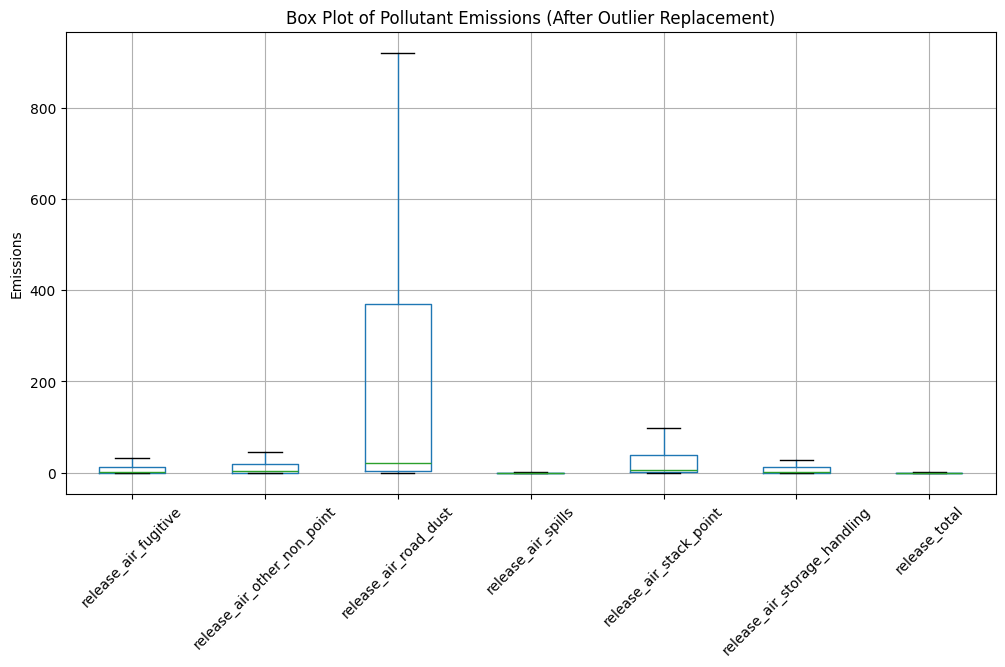

In [68]:
# Defining pollutant columns to check for outliers
pollutant_columns = [
    "release_air_fugitive", "release_air_other_non_point", "release_air_road_dust",
    "release_air_spills", "release_air_stack_point", "release_air_storage_handling",
    "release_total"
]

# Function to replace outliers with the closest non-outlier values
def replace_outliers_with_bounds(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replacing outliers with the closest bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Checking shape before replacing outliers
print("Shape before replacing outliers:", df.shape)

# Replacing outliers
df = replace_outliers_with_bounds(df, pollutant_columns)

# Checking shape after replacing outliers
print("Shape after replacing outliers:", df.shape)

# Creating box plots after replacing outliers
plt.figure(figsize=(12, 6))
df[pollutant_columns].boxplot(rot=45)
plt.title("Box Plot of Pollutant Emissions (After Outlier Replacement)")
plt.ylabel("Emissions")
plt.show()


## **Step-2: Feature Engineering**

This step involves the creation of new features and aggregation of data to provide deeper insights into the emissions data:

**Total Air Emissions:** A new feature, total_air_emissions, is created by summing various air pollutant release columns for each record. This feature represents the total air pollutant release per year.

**Aggregation by Year & Province:**
Emissions are aggregated by reporting_year and province, summarizing the total emissions by geographic location for both total_air_emissions and release_total.

**Aggregation by Industry Sector (NAICS Code):** Emissions are also aggregated by reporting_year and naics_code (industry sector), enabling insights into pollutant release across different sectors.

Finally, the aggregated data for both geographic regions (province) and industry sectors (NAICS code) are displayed to provide a comprehensive view of pollutant releases.

In [70]:
# Step 2: Feature Engineering

# Creating a new feature for total pollutant release per year (sum of all air pollutants)
df["total_air_emissions"] = df[
    ["release_air_fugitive", "release_air_other_non_point", "release_air_road_dust",
     "release_air_spills", "release_air_stack_point", "release_air_storage_handling"]
].sum(axis=1)

# Aggregate emissions by year and province (geographic impact)
df_aggregated = df.groupby(["reporting_year", "province"])[["total_air_emissions", "release_total"]].sum().reset_index()

# Aggregate emissions by industry sector (NAICS code impact)
df_naics = df.groupby(["reporting_year", "naics_code"])[["total_air_emissions", "release_total"]].sum().reset_index()

# Displaying engineered features
print("Aggregated Emissions by Province:")
print(df_aggregated.head())

print("\nAggregated Emissions by NAICS Industry Code:")
print(df_naics.head())

Aggregated Emissions by Province:
  reporting_year province  total_air_emissions  release_total
0     2000-01-01       AB        704248.758870     165.297381
1     2000-01-01       BC        331264.019057      67.418012
2     2000-01-01       MB        106884.768525      44.574086
3     2000-01-01       NB         99964.898333      17.852460
4     2000-01-01       NL         58040.051225       0.459153

Aggregated Emissions by NAICS Industry Code:
  reporting_year  naics_code  total_air_emissions  release_total
0     2000-01-01      111120          1165.938700       0.240000
1     2000-01-01      112999           883.940574       0.025000
2     2000-01-01      113210         10404.194063       0.312161
3     2000-01-01      115110           387.003930       0.000000
4     2000-01-01      115210          3447.683076       0.529614


## **Step-3: Classification Task**

**Defining Pollution Level Bins:** The total_air_emissions data is divided into three categories: Low, Medium, and High. The thresholds for these categories are determined using the 33rd and 66th percentiles of the total_air_emissions values.

**Classification Function:** A function is created to classify each record's pollution level based on its value.

**Low:** Pollution values below the 33rd percentile.

**Medium:** Pollution values between the 33rd and 66th percentiles.

**High:** Pollution values above the 66th percentile.

**Applying the Classification:**The classify_pollution function is applied to the dataset, creating a new column, pollution_level, which holds the pollution category for each record.

In [71]:
# Step 3: Classification Task Setup

# Defining percentile-based bins for pollution levels
quantiles = df["total_air_emissions"].quantile([0.33, 0.66])
low_threshold = quantiles[0.33]
high_threshold = quantiles[0.66]

# Function to classify pollution levels
def classify_pollution(value):
    if value <= low_threshold:
        return "Low"
    elif value <= high_threshold:
        return "Medium"
    else:
        return "High"

# Applying classification to the dataset
df["pollution_level"] = df["total_air_emissions"].apply(classify_pollution)

# Displaying updated dataset with pollution categories
print("Pollution Levels Categorized:")
print(df[["reporting_year", "province", "total_air_emissions", "pollution_level"]].head())

Pollution Levels Categorized:
  reporting_year province  total_air_emissions pollution_level
0     2000-01-01       AB           378.022211            High
1     2000-01-01       AB           470.878312            High
2     2000-01-01       AB           433.157211            High
3     2000-01-01       AB           380.492211            High
4     2000-01-01       AB           373.487211            High


### **Step 4: Model Training and Evaluation**
In this step, a Random Forest Classifier is used to predict the pollution levels (Low, Medium, High) based on individual pollutant releases which includes-

**Feature Selection:** We use the columns related to specific pollutants as features for model training. The target variable (y) is the pollution level (Low, Medium, or High).

**Target Encoding:** The pollution levels are encoded into numerical values:

Low = 0
Medium = 1
High = 2

**Data Splitting:** The dataset is split into training and test sets using a stratified split. This ensures that the distribution of pollution levels in both training and test sets is similar.

**Model Setup:** A Random Forest Classifier is trained with the following parameters:

n_estimators: 50 trees to reduce complexity.
max_depth: 7 to avoid overfitting.
max_features: Limits the features considered at each split.
min_samples_split: Ensures that each split requires at least 10 samples.
class_weight: Balanced to handle potential class imbalance in the dataset.
Training the Model: The classifier is trained on the training dataset.

**Prediction and Evaluation:**

Predictions are made on the test dataset.
The model's accuracy is calculated, and performance is evaluated using a classification report and confusion matrix.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Removing total_air_emissions (since it's directly linked to pollution_level)
pollutant_columns = [
    "release_air_fugitive", "release_air_other_non_point", "release_air_road_dust",
    "release_air_spills", "release_air_stack_point", "release_air_storage_handling"
]

X = df[pollutant_columns]  # Only using individual pollutants as features
y = df["pollution_level"]

# Encoding target labels
y_encoded = y.map({"Low": 0, "Medium": 1, "High": 2})

# Stratified Train-Test Split (Ensures Even Class Distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Model with Limited Depth (Avoid Overfitting)
model = RandomForestClassifier(
    n_estimators=50,        # Reduce number of trees
    max_depth=7,            # Limit tree depth
    max_features="sqrt",    # Reduce complexity
    min_samples_split=10,   # Require more samples per split
    class_weight="balanced",# Handle class imbalance
    random_state=42
)

model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing results
print(f"Model Accuracy: {accuracy:.4f}")  # Show more decimals for realism
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Model Accuracy: 0.9669

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     48676
           1       0.95      0.95      0.95     48676
           2       1.00      0.98      0.99     50152

    accuracy                           0.97    147504
   macro avg       0.97      0.97      0.97    147504
weighted avg       0.97      0.97      0.97    147504


Confusion Matrix:
 [[46971  1705     0]
 [ 2094 46480   102]
 [    0   980 49172]]


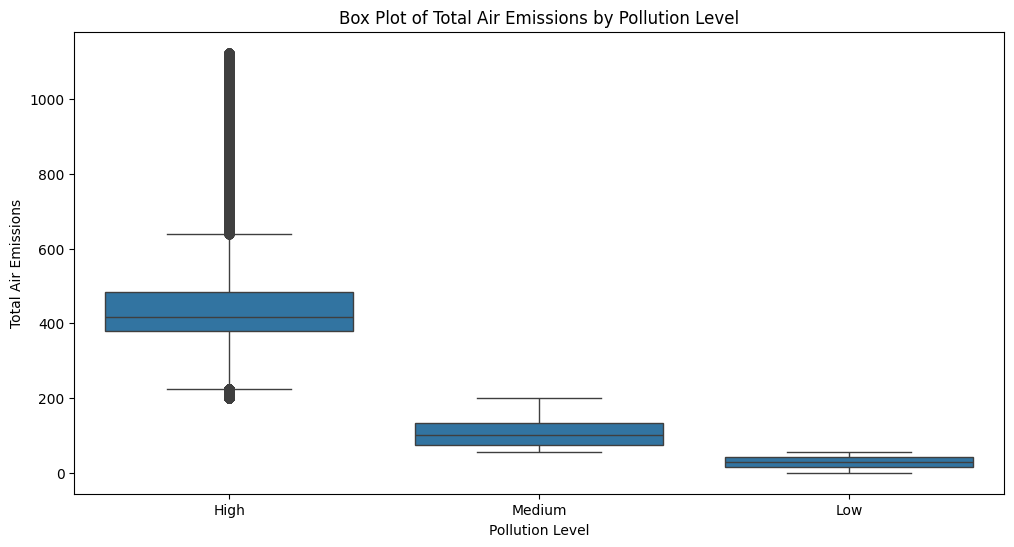

In [73]:
# Box Plot - Emission Distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["pollution_level"], y=df["total_air_emissions"])
plt.title("Box Plot of Total Air Emissions by Pollution Level")
plt.xlabel("Pollution Level")
plt.ylabel("Total Air Emissions")
plt.show()

In [76]:
import plotly.express as px

fig = px.line(
    df_aggregated,
    x="reporting_year",
    y="total_air_emissions",
    color="province",
    markers=True,
    title="Time Series Trend of Air Emissions by Province"
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Air Emissions",
    legend_title="Province"
)

fig.show()

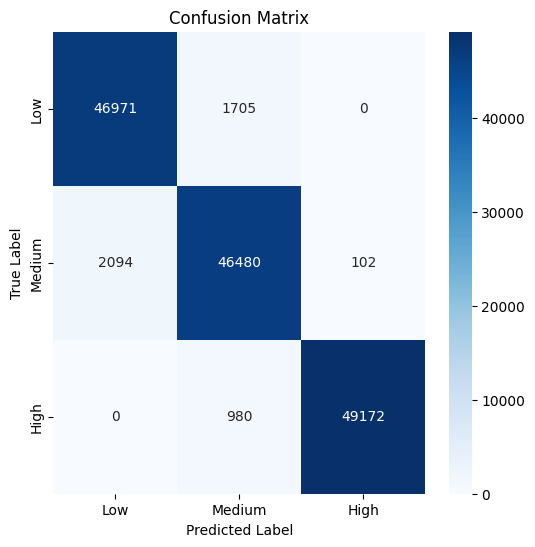

In [75]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()